In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Data QC & Pre-Processing

In [2]:
train = pd.read_csv('train.csv')
train_backup_fin = train.copy()
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
train['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [4]:
train.shape

(318438, 18)

In [5]:
train.drop('case_id', axis=1).drop_duplicates().shape, train.shape

((318373, 17), (318438, 18))

In [6]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
train.shape

(318438, 18)

In [8]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
test = pd.read_csv('test.csv')
test_backup_fin = test.copy()
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [10]:
test.drop('case_id', axis=1).drop_duplicates().shape, test.shape

((137029, 16), (137057, 17))

In [11]:
test.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


In [12]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [13]:
train.head(1)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10


In [14]:
train.nunique(), test.nunique()

(case_id                              318438
 Hospital_code                            32
 Hospital_type_code                        7
 City_Code_Hospital                       11
 Hospital_region_code                      3
 Available Extra Rooms in Hospital        18
 Department                                5
 Ward_Type                                 6
 Ward_Facility_Code                        6
 Bed Grade                                 4
 patientid                             92017
 City_Code_Patient                        37
 Type of Admission                         3
 Severity of Illness                       3
 Visitors with Patient                    28
 Age                                      10
 Admission_Deposit                      7300
 Stay                                     11
 dtype: int64, case_id                              137057
 Hospital_code                            32
 Hospital_type_code                        7
 City_Code_Hospital                      

In [15]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [16]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [17]:
train[['Hospital_type_code', 'Department','City_Code_Hospital','City_Code_Patient','Bed Grade','Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', \
      'Severity of Illness', 'Stay']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)        

,Hospital_type_code,Department,City_Code_Hospital,City_Code_Patient,Bed Grade,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Stay
Hospital_type_code,1.000000,-0.001805,0.479578,-0.064169,-0.010891,0.435558,-0.001805,-0.025166,-0.040607,-0.029767,-0.008282,0.004694
Department,-0.001805,1.000000,0.004026,0.016952,-0.019598,-0.011532,1.000000,0.014446,0.005305,-0.019206,0.018254,-0.009377
City_Code_Hospital,0.479578,0.004026,1.000000,-0.125737,-0.008912,0.620308,0.004026,-0.075898,0.300080,-0.128575,-0.042019,-0.026662
City_Code_Patient,-0.064169,0.016952,-0.125737,1.000000,-0.005641,-0.145225,0.016952,-0.026113,-0.131385,0.034007,0.057551,-0.037868
Bed Grade,-0.010891,-0.019598,-0.008912,-0.005641,1.000000,-0.007484,-0.019598,0.014827,-0.010434,-0.000263,-0.029128,-0.009018
Hospital_region_code,0.435558,-0.011532,0.620308,-0.145225,-0.007484,1.000000,-0.011532,0.114743,0.420479,-0.095031,-0.036283,-0.013378
Department,-0.001805,1.000000,0.004026,0.016952,-0.019598,-0.011532,1.000000,0.014446,0.005305,-0.019206,0.018254,-0.009377
Ward_Type,-0.025166,0.014446,-0.075898,-0.026113,0.014827,0.114743,0.014446,1.000000,0.095702,-0.057150,-0.024372,-0.026767
Ward_Facility_Code,-0.040607,0.005305,0.300080,-0.131385,-0.010434,0.420479,0.005305,0.095702,1.000000,-0.142180,-0.054283,-0.043592
Type of Admission,-0.029767,-0.019206,-0.128575,0.034007,-0.000263,-0.095031,-0.019206,-0.057150,-0.142180,1.000000,-0.024107,0.055059


In [18]:
train.drop(['Hospital_type_code', 'Department','City_Code_Hospital','City_Code_Patient','Bed Grade','Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', \
      'Severity of Illness', 'Stay'], axis=1).corr()

,case_id,Hospital_code,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043023,0.042580,-0.004150,0.001309,-0.045972
Hospital_code,-0.043023,1.000000,-0.059638,0.002291,-0.028500,0.045446
Available Extra Rooms in Hospital,0.042580,-0.059638,1.000000,0.000921,0.096714,-0.143739
patientid,-0.004150,0.002291,0.000921,1.000000,0.006889,-0.000877
Visitors with Patient,0.001309,-0.028500,0.096714,0.006889,1.000000,-0.150358
Admission_Deposit,-0.045972,0.045446,-0.143739,-0.000877,-0.150358,1.000000


In [19]:
train[train['patientid'].isin(test['patientid'])]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay


In [20]:
train.nunique(), test.nunique()

(case_id                              318438
 Hospital_code                            32
 Hospital_type_code                        7
 City_Code_Hospital                       11
 Hospital_region_code                      3
 Available Extra Rooms in Hospital        18
 Department                                5
 Ward_Type                                 6
 Ward_Facility_Code                        6
 Bed Grade                                 4
 patientid                             92017
 City_Code_Patient                        37
 Type of Admission                         3
 Severity of Illness                       3
 Visitors with Patient                    28
 Age                                      10
 Admission_Deposit                      7300
 Stay                                     11
 dtype: int64, case_id                              137057
 Hospital_code                            32
 Hospital_type_code                        7
 City_Code_Hospital                      

In [21]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [22]:
train_bp = train.copy()
y = train['Stay']
y_backup_fin = y.copy() 
train.drop('Stay', axis=1 ,inplace=True)

In [23]:
df_all = pd.concat([train, test], ignore_index=True)

In [24]:
df_all.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0


In [25]:
df_all.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             148
patientid                               0
City_Code_Patient                    6689
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [26]:
df_all[df_all['Bed Grade'].isnull()]['City_Code_Hospital'].value_counts()

6    143
4      4
7      1
Name: City_Code_Hospital, dtype: int64

In [27]:
df_all[df_all['City_Code_Hospital'] == 6]['Bed Grade'].value_counts()

3.0    25710
2.0    23671
4.0    13310
1.0     4607
Name: Bed Grade, dtype: int64

In [28]:
df_all['Bed Grade'].fillna(3, inplace=True)

In [29]:
df_all[df_all['City_Code_Patient'].isnull()]['City_Code_Hospital'].value_counts()

1     1701
6     1142
2      959
3      594
5      519
9      487
7      453
4      393
11     305
10      80
13      56
Name: City_Code_Hospital, dtype: int64

In [30]:
df_all[df_all['City_Code_Hospital'] == 1]['City_Code_Patient'].value_counts().index[0]

8.0

In [31]:
con1 = df_all['City_Code_Hospital'] == 1
con2 = df_all['City_Code_Hospital'] == 2
con3 = df_all['City_Code_Hospital'] == 3
con4 = df_all['City_Code_Hospital'] == 4
con5 = df_all['City_Code_Hospital'] == 5
con6 = df_all['City_Code_Hospital'] == 6
con7 = df_all['City_Code_Hospital'] == 7
# con8 = df_all['City_Code_Hospital'] == 8
con9 = df_all['City_Code_Hospital'] == 9
con10 = df_all['City_Code_Hospital'] == 10
con11 = df_all['City_Code_Hospital'] == 11
con12 = df_all['City_Code_Hospital'] == 13

In [32]:
for i in [con1, con2, con3, con4, con5, con6, con7, con9, con10, con11, con12]:
    df_all.loc[i,'City_Code_Patient'] = df_all.loc[i,'City_Code_Patient'].fillna(df_all.loc[i,'City_Code_Patient'].\
                                                                                 mode()[0])

In [33]:
df_all.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [34]:
train = df_all[:train.shape[0]]
test = df_all[train.shape[0]:]

In [35]:
df_all.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0


In [36]:
df_all['patientid'].nunique()

131624

In [37]:
df_all['Age'].value_counts()

41-50     91495
31-40     90420
51-60     69506
21-30     58560
71-80     50737
61-70     48619
11-20     23871
81-90     11240
0-10       9140
91-100     1907
Name: Age, dtype: int64

### EDA & Feature Engineering

In [38]:
df_all['n_time'] = df_all.groupby('patientid')['patientid'].cumcount() + 1 # n-th time the patient is taking admission

In [39]:
df_all.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,n_time
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,2


In [40]:
df_hospital_feature = pd.DataFrame(train.groupby(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code'\
                            ,'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'Department'])\
            ['patientid'].nunique()).reset_index()
df_hospital_feature.rename(columns={'patientid':'patient_count'}, inplace=True) # total patients admitted as per hospital feature

In [41]:
df_all.shape

(455495, 18)

In [42]:
df_all = pd.merge(df_all, df_hospital_feature, on=['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code'\
                            ,'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'Department'], how='left')

In [43]:
df_all.shape

(455495, 19)

In [44]:
df_all.isnull().sum()

case_id                               0
Hospital_code                         0
Hospital_type_code                    0
City_Code_Hospital                    0
Hospital_region_code                  0
Available Extra Rooms in Hospital     0
Department                            0
Ward_Type                             0
Ward_Facility_Code                    0
Bed Grade                             0
patientid                             0
City_Code_Patient                     0
Type of Admission                     0
Severity of Illness                   0
Visitors with Patient                 0
Age                                   0
Admission_Deposit                     0
n_time                                0
patient_count                        62
dtype: int64

In [45]:
df_all['patient_count'].fillna(-1, inplace=True)

In [46]:
df_all_backup = df_all.copy()

In [47]:
def target_encoder(df, column, target, index=None, method='mean'):
    
    index = df.index if index is None else index

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied")

    return encoded_column

In [48]:
train['target'] = y

In [49]:
train.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,target
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40


In [50]:
from sklearn.preprocessing import LabelEncoder

train_backup = train.copy()

le = LabelEncoder()

train['dept_label_encoded'] = le.fit_transform(train['Department'])
train['target'] = le.fit_transform(train['target'])

train['department_encoded'] = target_encoder(train, column='dept_label_encoded', target='target', method='mean')
train.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,target,dept_label_encoded,department_encoded
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0,3,2.817085
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4,3,2.817085
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3,1,2.499949


In [51]:
df_all = pd.merge(df_all, train[['Department', 'department_encoded']].drop_duplicates(), on=['Department'], how='left').drop_duplicates()

In [52]:
df_all.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,n_time,patient_count,department_encoded
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,1,56.0,2.817085
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,2,134.0,2.817085
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3,136.0,2.499949


In [53]:
df_all.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'n_time', 'patient_count', 'department_encoded'],
      dtype='object')

In [54]:
for i in ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age']:
    df_all = pd.concat([df_all, pd.get_dummies(df_all[i], prefix=i+'_')],axis=1)

In [55]:
df_all.drop(['patientid', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age'], axis=1, inplace=True)

In [56]:
train = df_all[:train.shape[0]]
test = df_all[train.shape[0]:]

In [57]:
train.drop(['City_Code_Patient__35.0', 'City_Code_Hospital__10', 'City_Code_Patient__38.0', 'Ward_Facility_Code__E', \
           'Ward_Facility_Code__D', 'City_Code_Hospital__11', 'City_Code_Hospital__13', 'Hospital_type_code__g', \
            'Ward_Facility_Code__C', 'Hospital_type_code__f', 'Ward_Type__U', 'City_Code_Patient__36.0', \
           'Department__surgery'], axis=1, inplace=True)

test.drop(['City_Code_Patient__35.0', 'City_Code_Hospital__10', 'City_Code_Patient__38.0', 'Ward_Facility_Code__E', \
           'Ward_Facility_Code__D', 'City_Code_Hospital__11', 'City_Code_Hospital__13', 'Hospital_type_code__g', \
            'Ward_Facility_Code__C', 'Hospital_type_code__f', 'Ward_Type__U', 'City_Code_Patient__36.0', \
           'Department__surgery'], axis=1, inplace=True)

In [58]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(n_estimators=200)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('case_id', axis=1), y, test_size=0.3, stratify=y, random_state=0)

In [60]:
lgbm.fit(X_train, y_train)

LGBMClassifier(n_estimators=200)

In [61]:
train_preds = lgbm.predict(X_train)
val_preds = lgbm.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_train, train_preds)

0.4530743901016572

In [64]:
accuracy_score(y_test, val_preds)

0.42886153330821086

In [65]:
lgbm.fit(train.drop('case_id', axis=1), y)

LGBMClassifier(n_estimators=200)

In [66]:
train.head(2)

,case_id,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,n_time,patient_count,department_encoded,Hospital_code__1,Hospital_code__2,Hospital_code__3,...,Age__0-10,Age__11-20,Age__21-30,Age__31-40,Age__41-50,Age__51-60,Age__61-70,Age__71-80,Age__81-90,Age__91-100
0,1,3,2,4911.0,1,56.0,2.817085,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,2,5954.0,2,134.0,2.817085,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
test.head(2)

,case_id,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,n_time,patient_count,department_encoded,Hospital_code__1,Hospital_code__2,Hospital_code__3,...,Age__0-10,Age__11-20,Age__21-30,Age__31-40,Age__41-50,Age__51-60,Age__61-70,Age__71-80,Age__81-90,Age__91-100
318438,318439,3,2,3095.0,1,1694.0,2.710437,0,0,0,...,0,0,0,0,0,0,0,1,0,0
318439,318440,2,4,4018.0,2,1642.0,2.710437,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
test['Stay'] = lgbm.predict(test.drop('case_id', axis=1))

In [69]:
# test[['case_id','Stay']].to_csv('subsmission_lgb.csv', index=False)

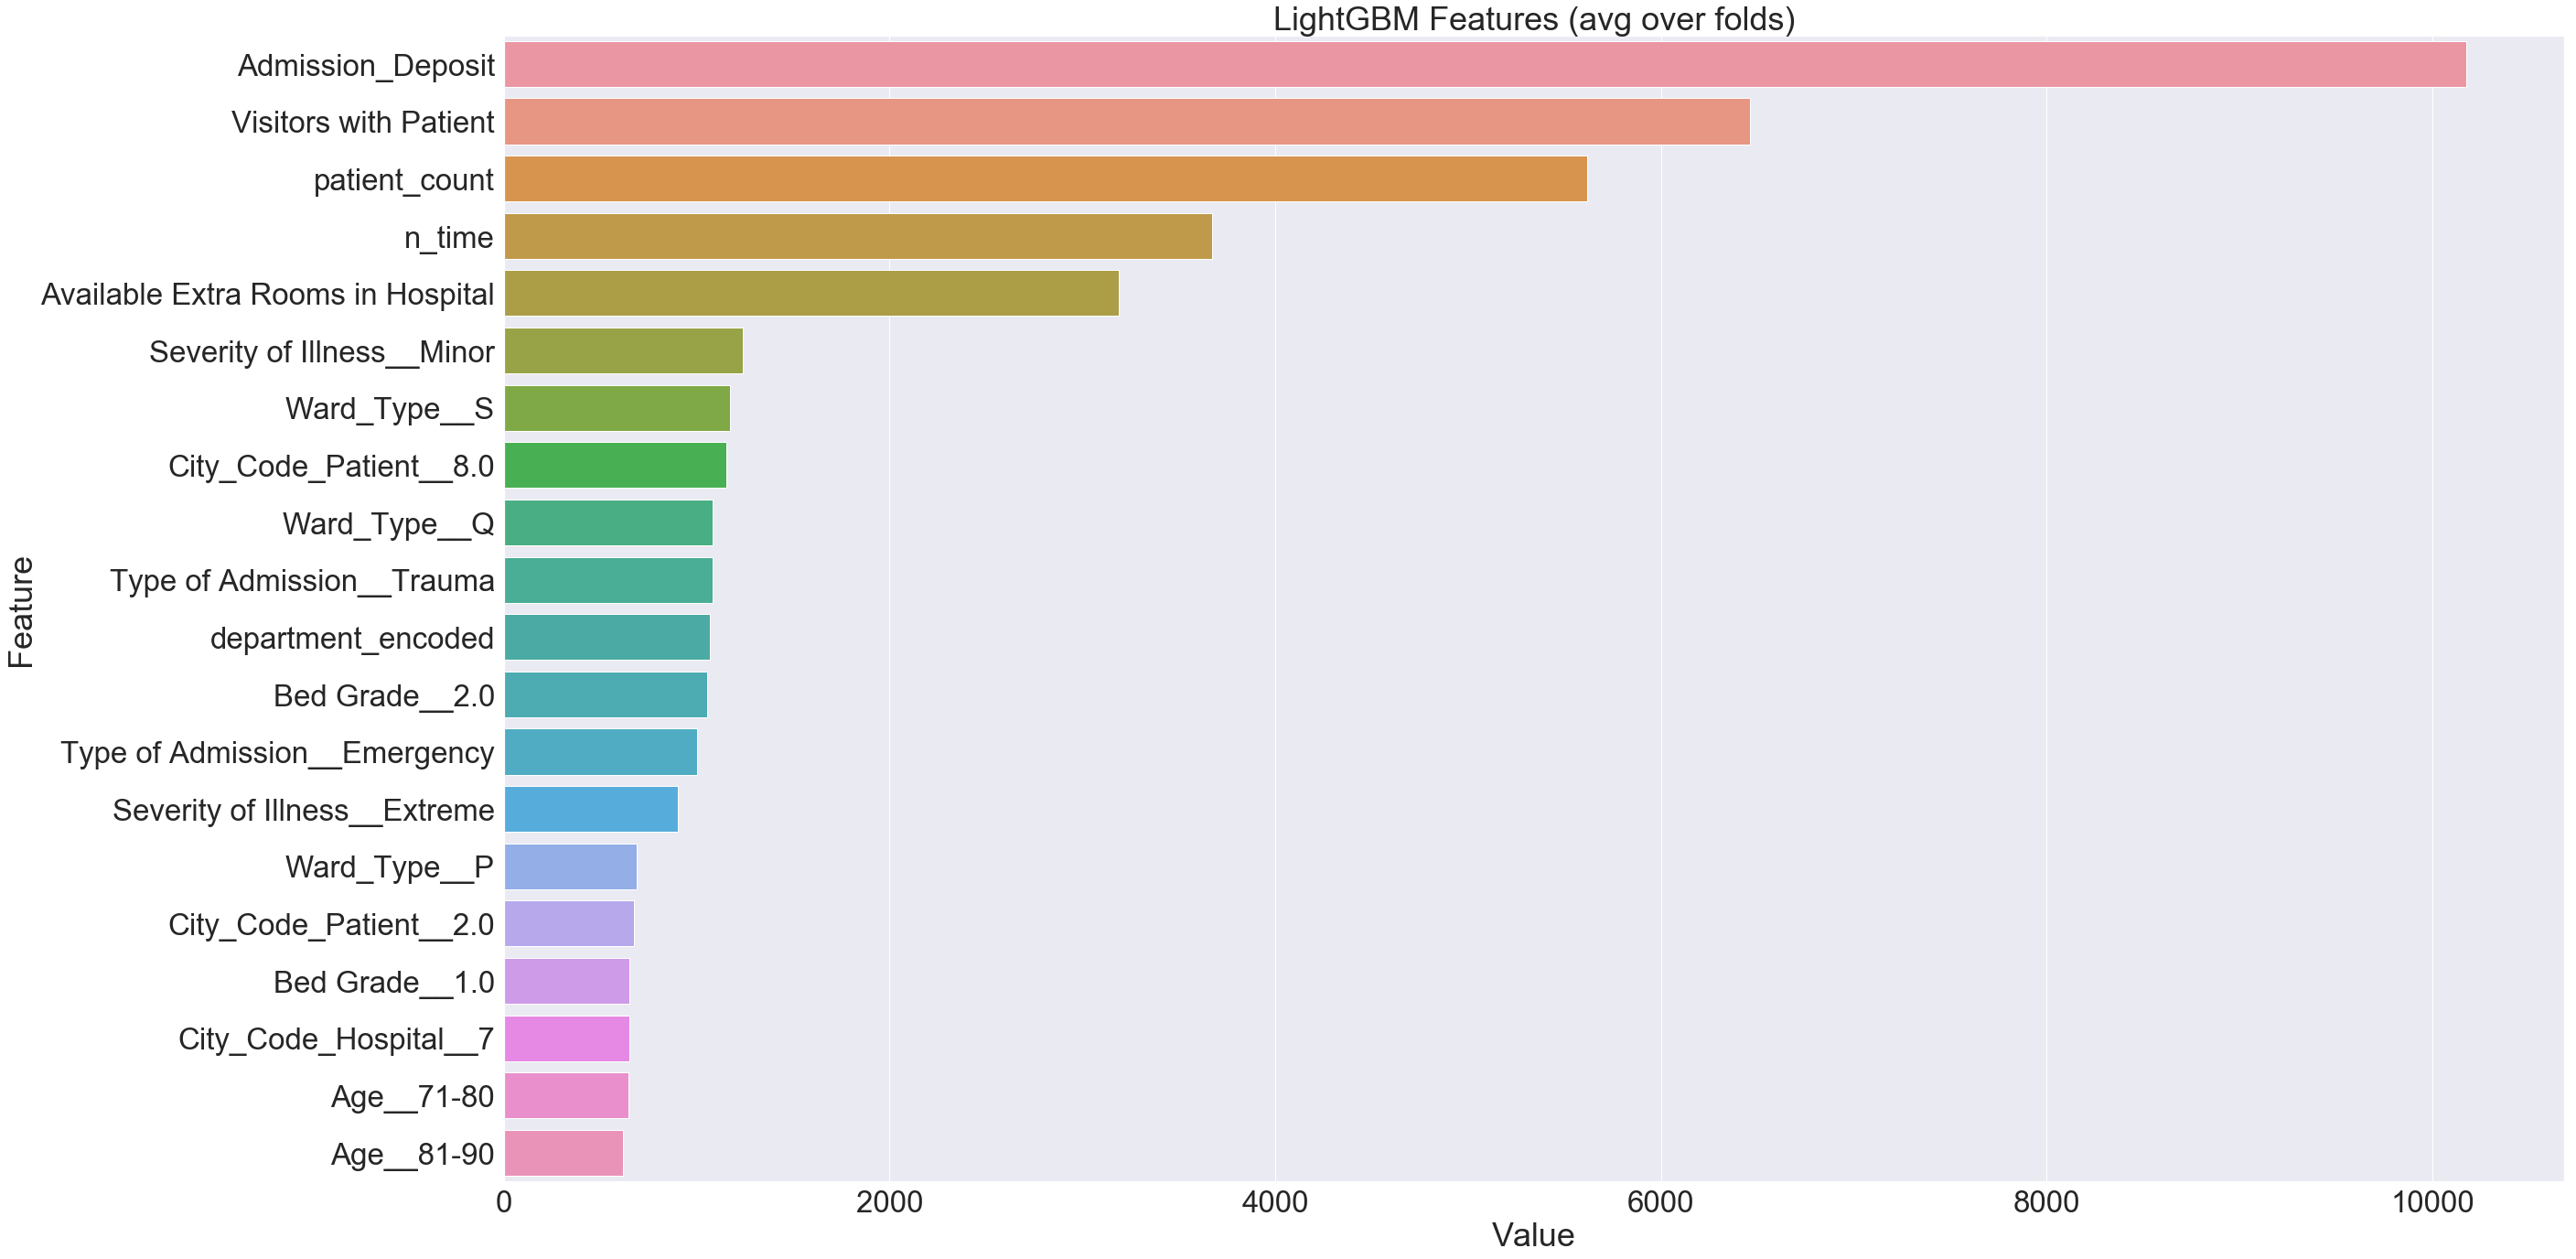

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def plotImp(model, X, num=20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    
plotImp(lgbm, train.drop('case_id', axis=1))

In [71]:
train = train_backup.copy()
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,target
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [72]:
train['target'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: target, dtype: int64

In [73]:
train_c1 = train[train['target'] == '21-30']
train_c2 = train[train['target'] == '11-20']
train_c3 = train[train['target'] == '31-40']
train_c4 = train[train['target'] == '51-60']
train_c5 = train[train['target'] == '0-10']
train_c6 = train[train['target'] == '41-50']
train_c7 = train[train['target'] == '71-80']
train_c8 = train[train['target'] == 'More than 100 Days']
train_c9 = train[train['target'] == '81-90']
train_c10 = train[train['target'] == '91-100']
train_c11 = train[train['target'] == '61-70']

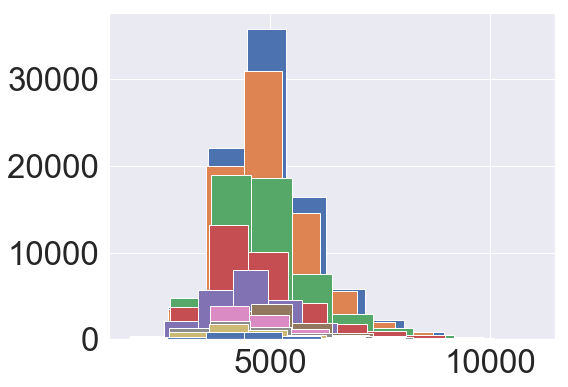

In [74]:
plt.figure(figsize=(8, 6))
plt.hist(train_c1['Admission_Deposit']), plt.hist(train_c2['Admission_Deposit']), \
plt.hist(train_c3['Admission_Deposit']), plt.hist(train_c4['Admission_Deposit']), \
plt.hist(train_c5['Admission_Deposit']), plt.hist(train_c6['Admission_Deposit']), \
plt.hist(train_c7['Admission_Deposit']), plt.hist(train_c8['Admission_Deposit']), \
plt.hist(train_c9['Admission_Deposit']), plt.hist(train_c10['Admission_Deposit']), \
plt.hist(train_c10['Admission_Deposit'])
plt.rcParams.update({'font.size': 10})

In [75]:
train_c1.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,target
10,11,22,g,9,Y,2,radiotherapy,S,B,2.0,31397,7.0,Urgent,Extreme,2,51-60,5797.0,21-30
13,14,9,d,5,Z,3,radiotherapy,S,F,3.0,31397,7.0,Urgent,Extreme,2,51-60,8477.0,21-30


In [76]:
# len(train['Hospital_code'].unique()), train['Hospital_code'].max()

In [77]:
df_all = df_all_backup.copy()

In [78]:
df_all.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,n_time,patient_count
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,1,56.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,2,134.0


In [79]:
df_all['patientid'].nunique(), df_all.shape

(131624, (455495, 19))

In [80]:
df_all['Visitors with Patient'].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25, 29], dtype=int64)

In [81]:
from kmodes.kmodes import KModes

In [82]:
hospital_cat = df_all[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department', \
                      'Ward_Type', 'Ward_Facility_Code', 'Bed Grade']]

patient_cat = df_all[['case_id', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', \
                      'Admission_Deposit']]

In [83]:
hospital_cat.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade
0,1,8,c,3,Z,radiotherapy,R,F,2.0
1,2,2,c,5,Z,radiotherapy,S,F,2.0


In [84]:
hospital_cat['Hospital_code'].unique(), hospital_cat['City_Code_Hospital'].unique(), hospital_cat['Bed Grade'].unique()

(array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
        19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20],
       dtype=int64),
 array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13], dtype=int64),
 array([2., 3., 4., 1.]))

In [85]:
hospital_cat['Hospital_code'] = hospital_cat['Hospital_code'] - 1 # making ordinal
hospital_cat['Bed Grade'] = hospital_cat['Bed Grade'] - 1

In [86]:
le = LabelEncoder()

In [87]:
for i in hospital_cat.drop(['Hospital_code', 'Bed Grade'], axis=1).columns:
    hospital_cat[i] = le.fit_transform(hospital_cat[i])

In [88]:
# cost = []
# K = range(1, 6)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
#     kmode.fit_predict(hospital_cat.drop('case_id', axis=1))
#     cost.append(kmode.cost_)
    
# plt.plot(K, cost, 'bx-')
# plt.xlabel('k clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [89]:
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(hospital_cat.drop('case_id', axis=1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6305, cost: 934818.0
Run 1, iteration: 2/100, moves: 0, cost: 934818.0


In [90]:
hospital_cat['hospitalization_category'] = fitClusters_cao

In [91]:
hospital_cat['hospitalization_category'].value_counts()

0    87304
1    74312
3    69999
2    50279
4    43284
7    41446
5    37428
8    24572
6    14183
9    12688
Name: hospitalization_category, dtype: int64

In [92]:
patient_cat.head(2)

,case_id,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,7.0,Trauma,Extreme,2,51-60,5954.0


In [93]:
le = LabelEncoder()

for i in ['Type of Admission', 'Severity of Illness', 'Age', 'City_Code_Patient']:
    patient_cat[i] = le.fit_transform(patient_cat[i])

In [94]:
# cost = []
# K = range(1, 6)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
#     kmode.fit_predict(patient_cat.drop('case_id', axis=1))
#     cost.append(kmode.cost_)
    
# plt.plot(K, cost, 'bx-')
# plt.xlabel('k clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [95]:
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao_patient = km_cao.fit_predict(patient_cat.drop('case_id', axis=1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1333475.0


In [96]:
patient_cat['patient_category'] = fitClusters_cao_patient

In [97]:
df_all = pd.merge(df_all, hospital_cat[['case_id', 'hospitalization_category']], on=['case_id'], how='left').drop_duplicates()
df_all = pd.merge(df_all, patient_cat[['case_id', 'patient_category']], on=['case_id'], how='left').drop_duplicates()

In [98]:
df_all.reset_index(drop=True, inplace=True)

In [99]:
df_all.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,n_time,patient_count,hospitalization_category,patient_category
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,7.0,Emergency,Extreme,2,51-60,4911.0,1,56.0,4.0,4
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,7.0,Trauma,Extreme,2,51-60,5954.0,2,134.0,3.0,7


In [100]:
# df_all.to_csv('entire_train_test_with_features.csv', index=False)

In [101]:
df_all.nunique()

case_id                              455495
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                            131624
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    29
Age                                      10
Admission_Deposit                      7634
n_time                                   50
patient_count                           443
hospitalization_category                 10
patient_category                         10
dtype: int64

In [102]:
df_all.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'n_time', 'patient_count',
       'hospitalization_category', 'patient_category'],
      dtype='object')

In [103]:
df_all.shape

(455495, 21)

In [104]:
df_all['City_Code_Hospital'] = df_all['City_Code_Hospital'].astype(str)
df_all['City_Code_Patient'] = df_all['City_Code_Patient'].astype(str)

In [105]:
df_all['change_in_admission_deposit'] = df_all.groupby('patientid')['Admission_Deposit'].diff(1)
df_all['change_in_visitor_with_patient'] = df_all.groupby('patientid')['Visitors with Patient'].diff(1)

In [106]:
df_all['change_in_admission_deposit'].fillna(0, inplace=True)
df_all['change_in_visitor_with_patient'].fillna(0, inplace=True)

In [107]:
df_all['min_age'] = df_all['Age'].apply(lambda x: x.split('-')[0])
df_all['min_age'] = df_all['min_age'].astype(int)
df_all['min_age'] = np.where(df_all['min_age'] == 0, 1, df_all['min_age'])

df_all['max_age'] = df_all['Age'].apply(lambda x: x.split('-')[1])
df_all['max_age'] = df_all['max_age'].astype(int)

In [108]:
df_all.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Age,Admission_Deposit,n_time,patient_count,hospitalization_category,patient_category,change_in_admission_deposit,change_in_visitor_with_patient,min_age,max_age
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,...,51-60,4911.0,1,56.0,4.0,4,0.0,0.0,51,60
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,...,51-60,5954.0,2,134.0,3.0,7,1043.0,0.0,51,60


In [109]:
df_all.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'n_time', 'patient_count',
       'hospitalization_category', 'patient_category',
       'change_in_admission_deposit', 'change_in_visitor_with_patient',
       'min_age', 'max_age'],
      dtype='object')

In [110]:
df_all.nunique()

case_id                              455495
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                            131624
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    29
Age                                      10
Admission_Deposit                      7634
n_time                                   50
patient_count                           443
hospitalization_category                 10
patient_category                         10
change_in_admission_deposit           10482
change_in_visitor_with_patient  

In [111]:
df_all['n_time_hospital'] = df_all.groupby(['patientid', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code'])\
['patientid'].cumcount() + 1

In [112]:
df_all['n_time_hospital_bed'] = df_all.groupby(['patientid', 'Hospital_code', 'City_Code_Hospital', 'Hospital_region_code'])\
['Bed Grade'].cumcount() + 1

In [113]:
df_all['n_time_dept'] = df_all.groupby(['patientid', 'Department'])\
['Department'].cumcount() + 1

In [114]:
df_all['n_time_admission'] = df_all.groupby(['patientid', 'City_Code_Hospital'])['City_Code_Hospital'].cumcount()+1

In [115]:
df_all['n_time_city'] = df_all.groupby(['patientid', 'City_Code_Patient'])['City_Code_Patient'].cumcount()+1

In [116]:
df_all['change_in_admissionrooms'] = df_all.groupby('patientid')['Available Extra Rooms in Hospital'].diff(1)
df_all['change_in_admissionrooms'].fillna(0, inplace=True)

In [117]:
df_all['n_time_dept_hostype'] = df_all.groupby(['Hospital_type_code', 'Department'])\
['Department'].cumcount() + 1

In [118]:
df_all_prefeat = df_all.copy()

# df_all_prefeat = df_all_prefeat.to_csv('preprocess_entire_features.csv', index=False) 

In [119]:
df_all.shape

(455495, 32)

In [120]:
df_all.shape

(455495, 32)

In [121]:
for i in ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness']:
    df_all = pd.concat([df_all, pd.get_dummies(df_all[i], prefix=i+'_')],axis=1)

In [122]:
df_all_bp = df_all.copy()

In [123]:
df_all.drop(['case_id', 'patientid', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age'], axis=1, inplace=True)

In [124]:
df_all.head(2)

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,n_time,patient_count,hospitalization_category,patient_category,change_in_admission_deposit,change_in_visitor_with_patient,min_age,...,City_Code_Patient__6.0,City_Code_Patient__7.0,City_Code_Patient__8.0,City_Code_Patient__9.0,Type of Admission__Emergency,Type of Admission__Trauma,Type of Admission__Urgent,Severity of Illness__Extreme,Severity of Illness__Minor,Severity of Illness__Moderate
0,3,2,4911.0,1,56.0,4.0,4,0.0,0.0,51,...,0,1,0,0,1,0,0,1,0,0
1,2,2,5954.0,2,134.0,3.0,7,1043.0,0.0,51,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
train = df_all[:train_backup_fin.shape[0]]
test = df_all[train_backup_fin.shape[0]:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, stratify=y, test_size=0.3, random_state=0)

In [ ]:
lgbm = lgb.LGBMClassifier(n_estimators=200)

lgbm.fit(X_train, y_train)

In [128]:
train_preds = lgbm.predict(X_train)
val_preds = lgbm.predict(X_test)

In [129]:
accuracy_score(y_train, train_preds)

0.4625716669807004

In [130]:
accuracy_score(y_test, val_preds)

0.4327869195662187

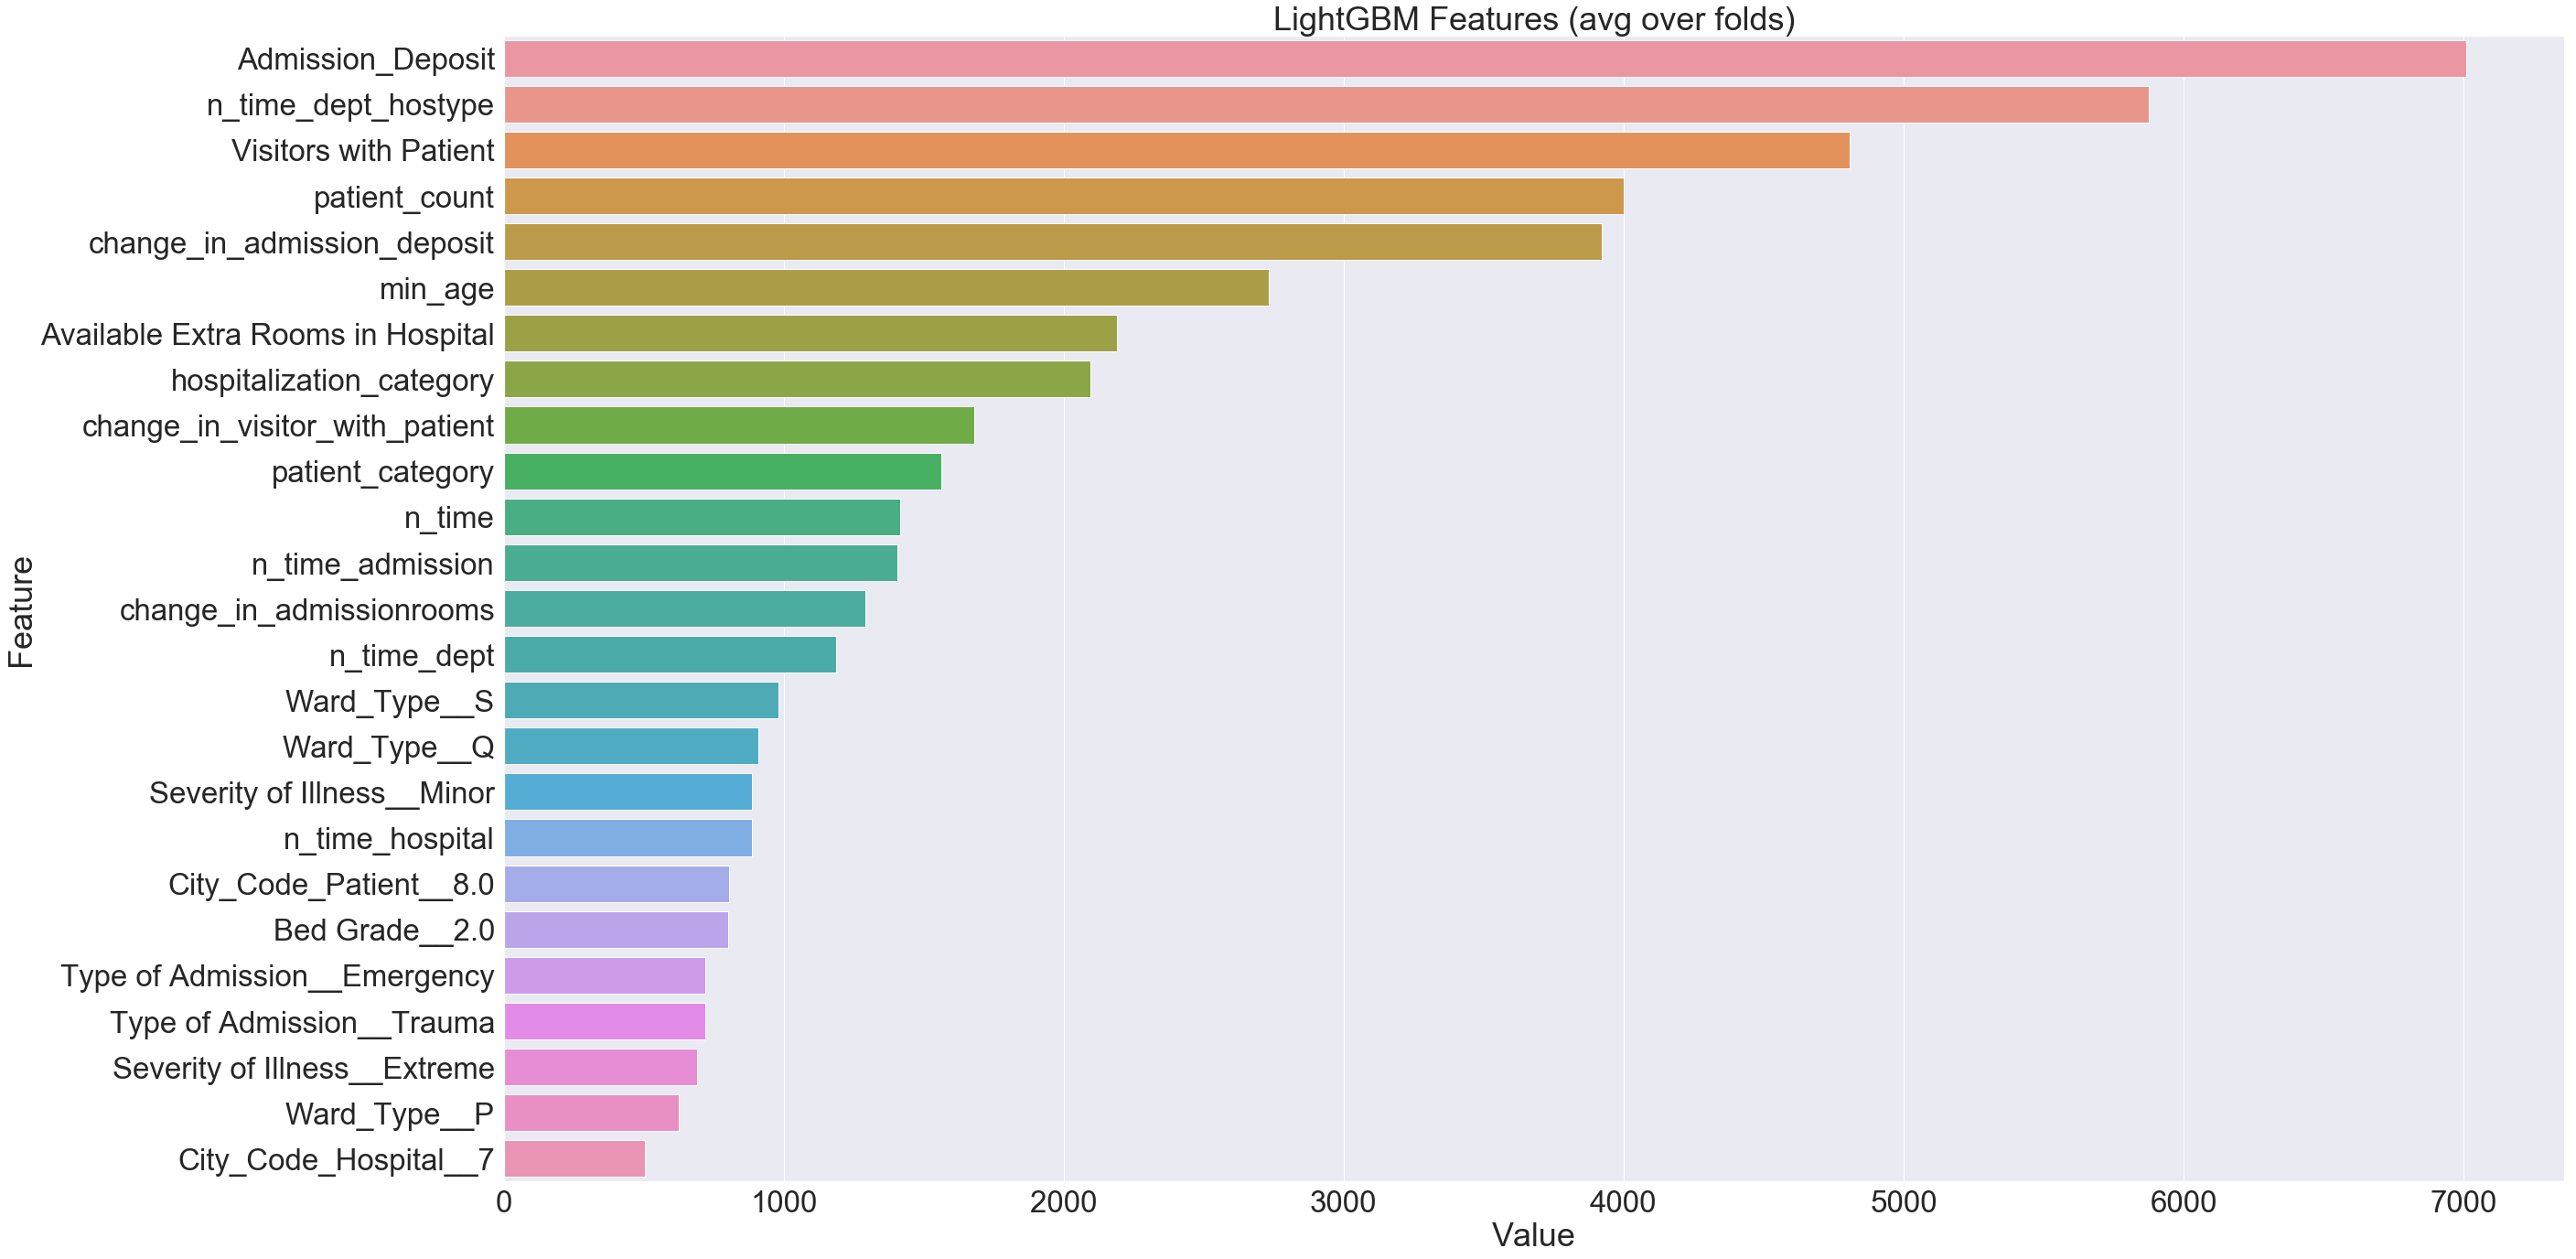

In [131]:
plotImp(lgbm, train, num=25)

In [132]:
train['Stay'] = y_backup_fin

In [133]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [134]:
# train_fine = train[~train['Stay'].isin(['91-100', '61-70'])]
# train_low1 = train[train['Stay'] == '61-70']
# train_low2 = train[train['Stay'] == '91-100']

# train = pd.concat([train_fine, train_low1, train_low1, train_low1, train_low2, train_low2, train_low2], ignore_index=True)

In [135]:
# y = train['Stay']
# train.drop('Stay', axis=1, inplace=True)

In [136]:
# lgbm.fit(train, y)

LGBMClassifier(n_estimators=200)

In [137]:
preds = lgbm.predict(test)

In [138]:
test = df_all_bp[-test_backup_fin.shape[0]:]

In [139]:
test['Stay'] = preds

In [140]:
test[['case_id', 'Stay']].to_csv('lgb_baseline.csv', index=False)